In [2]:
import pandas as pd
import numpy as np 
from scipy.stats import pearsonr, spearmanr
import os
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('/home/mzo5929/Keerthana/grnInference/simulationData/asynchronous_division/actual_variation/samples_replicates_with_regulation_0.csv', index_col=0)


In [3]:
df

,TF_is_bursting,Target_is_bursting,TF_protein_1K,spliced_labeled_Target,spliced_labeled_TF,spliced_unlabeled_Target,spliced_unlabeled_TF,unspliced_labeled_Target,unspliced_labeled_TF,unspliced_unlabeled_Target,...,unspliced_Target,mRNA_ever_produced_Target,mRNA_ever_produced_TF,protein_ever_produced_TF,k_on_Target_adjusted,total_TF_mRNA,total_Target_mRNA,cell_index,sampling_time,replicate
0,False,False,62.285970,0.0,0.0,21.000000,16.28,0.0,0.0,1.987949e-277,...,1.987949e-277,5775.000000,2737.28,559.253219,0.168204,16.28,21.000000,0,0,0
1,False,False,48.937513,0.0,0.0,17.249986,26.52,0.0,0.0,7.530867e-196,...,7.530867e-196,3223.733333,2132.48,445.419799,0.105532,26.52,17.249986,1,0,0
2,False,False,89.928326,0.0,0.0,87.200000,48.60,0.0,0.0,2.643392e-76,...,2.643392e-76,3465.000000,2459.52,509.405220,0.335336,48.60,87.200000,2,0,0
3,False,False,79.148163,0.0,0.0,31.169925,14.80,0.0,0.0,7.702017e-176,...,7.702017e-176,4460.866667,3068.80,633.921946,0.264760,14.80,31.169925,3,0,0
4,False,False,56.728706,0.0,0.0,20.066667,32.80,0.0,0.0,9.446139e-310,...,9.446139e-310,2197.066667,2369.92,464.663606,0.140535,32.80,20.066667,4,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1959995,False,False,59.757859,0.0,0.0,9.133333,29.04,0.0,0.0,1.073273e-169,...,1.073273e-169,3701.133333,2576.00,528.210980,0.155346,29.04,9.133333,19995,2880,1
1959996,False,False,73.033017,0.0,0.0,23.236012,7.96,0.0,0.0,1.942922e-61,...,1.942922e-61,4655.933333,3252.48,669.336904,0.227668,7.96,23.236012,19996,2880,1
1959997,False,False,75.483144,0.0,0.0,77.733333,54.72,0.0,0.0,3.715141e-25,...,3.715141e-25,3470.133333,2817.92,579.344552,0.242259,54.72,77.733333,19997,2880,1
1959998,False,False,46.579576,0.0,0.0,10.266667,3.40,0.0,0.0,0.000000e+00,...,0.000000e+00,1935.266667,2576.00,526.620070,0.095845,3.40,10.266667,19998,2880,1


In [31]:
division_time = pd.read_csv('/home/mzo5929/Keerthana/grnInference/simulationData/asynchronous_division/division_time.csv')

In [6]:
rep1 = df[df['replicate'] == 0]
rep2 = df[df['replicate'] == 1].reset_index(drop=True)

In [7]:
rep1[rep1['sampling_time'] == 2220]

,TF_is_bursting,Target_is_bursting,TF_protein_1K,spliced_labeled_Target,spliced_labeled_TF,spliced_unlabeled_Target,spliced_unlabeled_TF,unspliced_labeled_Target,unspliced_labeled_TF,unspliced_unlabeled_Target,...,unspliced_Target,mRNA_ever_produced_Target,mRNA_ever_produced_TF,protein_ever_produced_TF,k_on_Target_adjusted,total_TF_mRNA,total_Target_mRNA,cell_index,sampling_time,replicate
740000,False,False,77.985561,0.0,0.0,90.000000,125.28,0.0,0.0,3.852025e-109,...,3.852025e-109,6083.000000,3185.28,632.767810,0.257536,125.28,90.000000,0,2220,0
740001,False,False,28.375638,0.0,0.0,0.000000,10.28,0.0,0.0,0.000000e+00,...,0.000000e+00,3239.133333,2186.24,458.932924,0.036113,10.28,0.000000,1,2220,0
740002,False,False,70.774833,0.0,0.4,3.600000,6.24,0.0,0.0,0.000000e+00,...,0.000000e+00,3788.400000,2674.56,563.570726,0.214550,6.64,3.600000,2,2220,0
740003,False,False,64.254773,0.0,0.0,150.866667,23.00,0.0,0.0,1.548603e-26,...,1.548603e-26,4697.000000,3292.80,678.166557,0.178523,23.00,150.866667,3,2220,0
740004,False,False,86.531902,0.0,0.0,70.066667,29.84,0.0,0.0,5.359803e-25,...,5.359803e-25,2428.066667,2808.96,561.572802,0.312425,29.84,70.066667,4,2220,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
759995,False,False,46.070018,0.0,0.0,27.733333,0.80,0.0,0.0,0.000000e+00,...,0.000000e+00,3916.733333,2405.76,495.747139,0.093809,0.80,27.733333,19995,2220,0
759996,False,False,88.374128,0.0,0.0,7.369345,19.84,0.0,0.0,0.000000e+00,...,0.000000e+00,4584.066667,3279.36,667.205015,0.324778,19.84,7.369345,19996,2220,0
759997,False,False,93.733903,0.0,0.0,26.266667,16.40,0.0,0.0,9.690092e-74,...,9.690092e-74,3259.666667,2835.84,588.736311,0.361697,16.40,26.266667,19997,2220,0
759998,False,False,72.453930,0.0,0.0,44.000000,11.68,0.0,0.0,4.053056e-28,...,4.053056e-28,1694.000000,2647.68,542.540424,0.224273,11.68,44.000000,19998,2220,0


In [ ]:
rep2[rep2['cell_index'] == 3][480:510]

In [17]:
rep1 = df[df['replicate'] == 0]
rep2 = df[df['replicate'] == 1].reset_index(drop=True)
rep2.columns

Index(['TF_is_bursting', 'Target_is_bursting', 'TF_protein_1K',
       'spliced_labeled_Target', 'spliced_labeled_TF',
       'spliced_unlabeled_Target', 'spliced_unlabeled_TF',
       'unspliced_labeled_Target', 'unspliced_labeled_TF',
       'unspliced_unlabeled_Target', 'unspliced_unlabeled_TF',
       'unspliced_Target', 'mRNA_ever_produced_Target',
       'mRNA_ever_produced_TF', 'protein_ever_produced_TF',
       'k_on_Target_adjusted', 'total_TF_mRNA', 'total_Target_mRNA',
       'sampling_time', 'cell_index', 'replicate', 'replicate_index'],
      dtype='object')

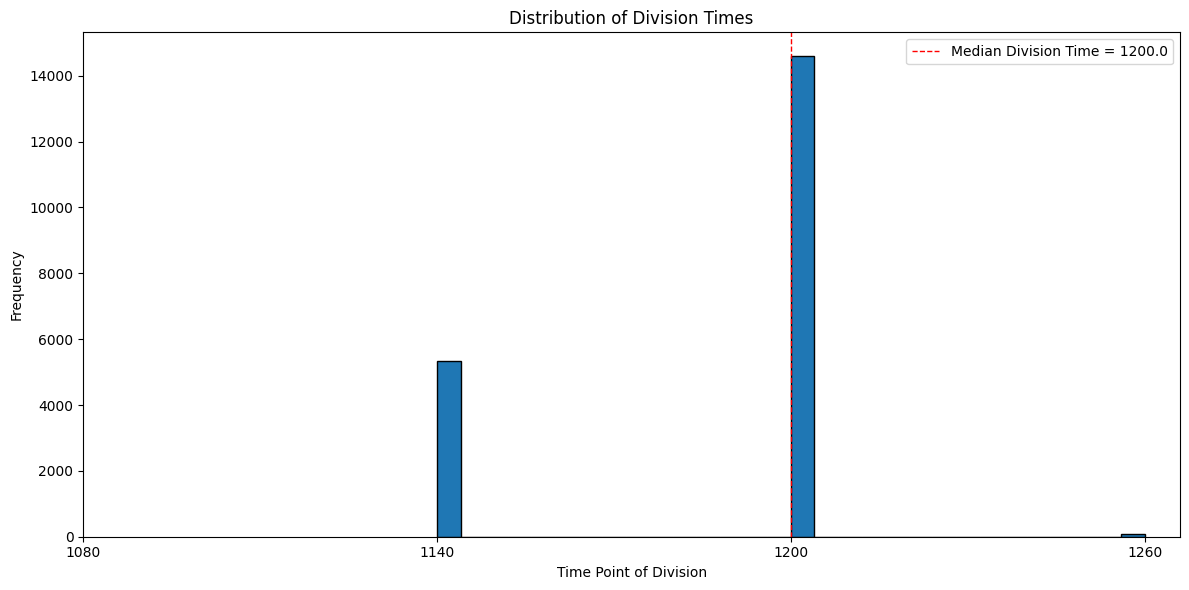

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Split original and replicate data
rep1 = df[df['replicate'] == 0]
rep2 = df[df['replicate'] == 1].reset_index(drop=True)

# Identify state variables
stateVars = [col for col in rep2.columns if col not in ['replicate', 'sampling_time', 'cell_index', 'replicate_index']]

# Number of cells per timepoint
numCells = 20000  # or len(replicate1['sampling_time'].value_counts().values[0])

# Identify first time when any state variable becomes non-zero (i.e., cell has divided)
rep2["is_nonzero"] = rep2[stateVars].any(axis=1)
divisionTimes = (
    rep2[rep2["is_nonzero"]]
    .groupby("cell_index")["sampling_time"]
    .first()
)

# Plot
plt.figure(figsize=(12, 6))
plt.hist(divisionTimes.dropna(), bins=30, edgecolor='black')
plt.title('Distribution of Division Times')
plt.xlabel('Time Point of Division')
plt.ylabel('Frequency')
plt.xticks(np.arange(1080, 1320, 60))
plt.axvline(divisionTimes.median(), color='red', linestyle='dashed', linewidth=1, label='Median Division Time = {}'.format(divisionTimes.median()))
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
divisionTimes

In [6]:
def get_aligned_twin_data(time_point, rep1, rep2):
    """
    Align rep1 (originals) and rep2 (replicates) for a specific sampling time.

    Parameters:
        time_point (int): Time point in minutes (e.g., 540 for 9 hours).
        rep1 (pd.DataFrame): DataFrame with original cells.
        rep2 (pd.DataFrame): DataFrame with replicates.

    Returns:
        pd.DataFrame: Aligned DataFrame with suffixes _orig and _rep for each variable.
    """
    rep1_t = rep1[rep1['sampling_time'] == time_point].copy()
    rep2_t = rep2[rep2['sampling_time'] == time_point].copy()

    # Rename columns for clarity
    rep1_t = rep1_t.rename(columns=lambda x: f"{x}_1" if x not in ['cell_index', 'sampling_time'] else x)
    rep2_t = rep2_t.rename(columns=lambda x: f"{x}_2" if x not in ['cell_index', 'sampling_time'] else x)

    # Merge on original cell index ↔ replicate index and sampling time
    aligned_df = rep1_t.merge(
        rep2_t,
        left_on=['cell_index', 'sampling_time'],
        right_on=['cell_index', 'sampling_time'],
        how='inner'
    )

    return aligned_df


In [20]:
t0 = 20 * 60
t1 = 25 * 60
t2 = 30 * 60

aligned_t0 = get_aligned_twin_data(t0, rep1, rep2)
aligned_t1 = get_aligned_twin_data(t1, rep1, rep2)
aligned_t2 = get_aligned_twin_data(t2, rep1, rep2)


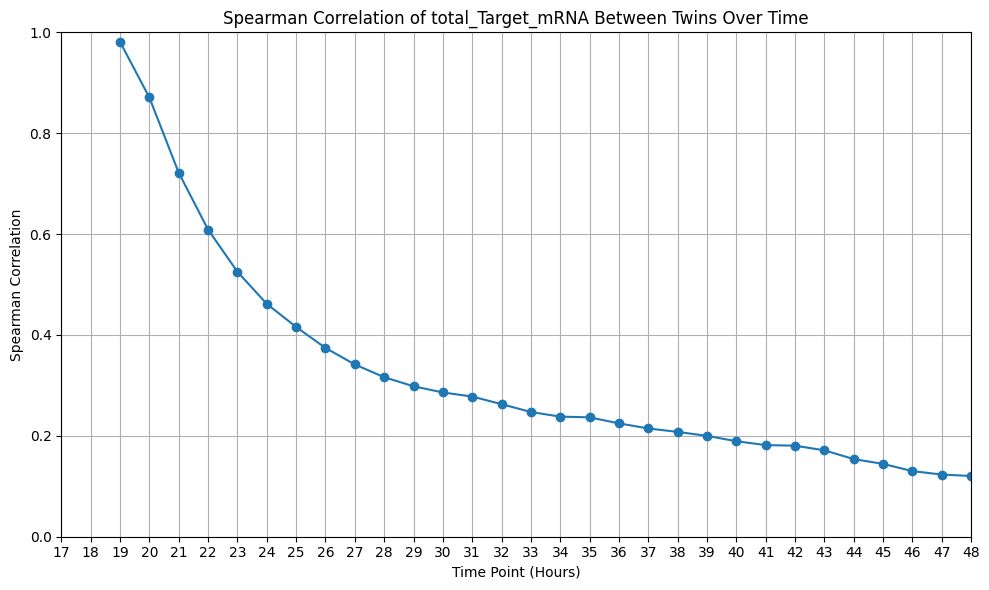

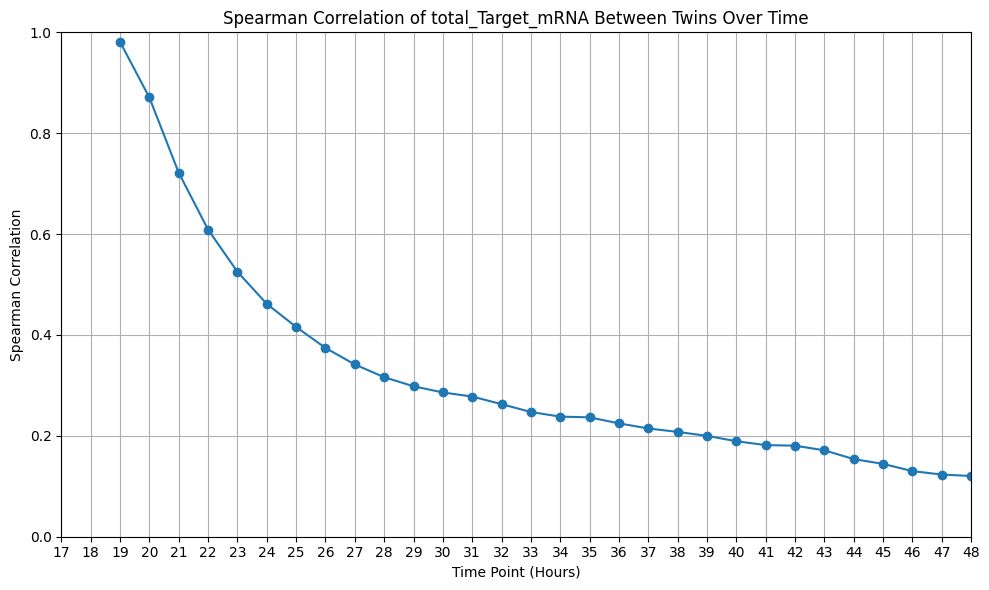

In [7]:
def plot_twin_correlation_over_time(rep1, rep2, variable='total_TF_mRNA', time_range=(1080, 2880), step=60):
    """
    Plots Spearman correlation between twins over time for a given variable.

    Parameters:
        rep1 (pd.DataFrame): Original cell data.
        rep2 (pd.DataFrame): Replicate cell data.
        variable (str): Base name of the variable to compare (e.g., 'total_TF_mRNA').
        time_range (tuple): (start_time, end_time) in minutes.
        step (int): Sampling interval in minutes.

    Returns:
        None
    """
    corr_list = []
    time_list = []

    for timePoint in np.arange(time_range[0], time_range[1] + 1, step):
        aligned_data = get_aligned_twin_data(timePoint, rep1, rep2)
        if aligned_data.empty:
            continue

        # Filter to cases where any replicate 2 state variable is non-zero
        stateVarsRep2 = [
            col for col in aligned_data.columns 
            if col.endswith('_2') and col not in ['replicate_2', 'sampling_time_2', 'cell_index_2', 'replicate_index_2']
        ]

        aligned_data['non_zero'] = aligned_data[stateVarsRep2].any(axis=1)
        aligned_data = aligned_data[aligned_data['non_zero']].reset_index(drop=True)

        var_1 = f"{variable}_1"
        var_2 = f"{variable}_2"

        if var_1 not in aligned_data.columns or var_2 not in aligned_data.columns:
            continue

        x = aligned_data[var_1]
        y = aligned_data[var_2]

        if len(x) > 1:
            corr = spearmanr(x, y)[0]
        else:
            corr = np.nan

        corr_list.append(corr)
        time_list.append(timePoint/60)

    # Plot
    plt.figure(figsize=(10, 6))
    plt.plot(time_list, corr_list, marker='o')
    plt.title(f'Spearman Correlation of {variable} Between Twins Over Time')
    plt.xlabel('Time Point (Hours)')
    plt.ylabel('Spearman Correlation')
    plt.xticks(np.arange(time_range[0], time_range[1] + 1, step)/60)  # Convert minutes to hours
    plt.xlim(time_range[0]/60, time_range[1]/60)  # Adjust x-axis limits to hours
    plt.ylim(0, 1)
    plt.grid(True)
    plt.tight_layout()
    plt.show()
plot_twin_correlation_over_time(rep1, rep2, variable='total_Target_mRNA', time_range=(1020, 2880), step=60)
plot_twin_correlation_over_time(rep1, rep2, variable='total_Target_mRNA', time_range=(1020, 2880), step=60)


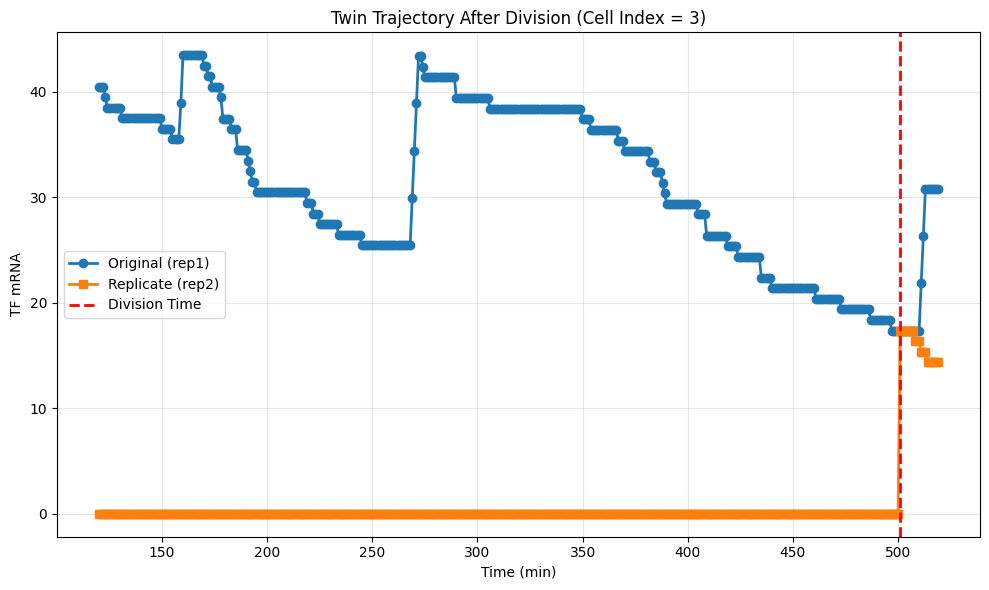

In [14]:
import numpy as np
import matplotlib.pyplot as plt

def plot_twin_divergence(rep1, rep2, original_idx, start_time, num_steps=10, division_time=None):
    """
    Track the difference in TF mRNA between a twin pair after division.

    Args:
        rep1 (DataFrame): Original cells DataFrame.
        rep2 (DataFrame): Replicate cells DataFrame.
        original_idx (int): Cell index that divided.
        start_time (int): Time of division (in minutes).
        num_steps (int): How many time points to track after division.
        division_time (int): Time when division occurred (for reference line).
    """
    t_points = [start_time + i for i in range(num_steps)]
    
    x_vals = []
    y_vals = []

    for t in t_points:
        # Filter data for the specific cell and time point
        x = rep1[(rep1['cell_index'] == original_idx) & (rep1['sampling_time'] == t)]['total_TF_mRNA']
        y = rep2[(rep2['cell_index'] == original_idx) & (rep2['sampling_time'] == t)]['total_TF_mRNA']

        # Handle empty results more robustly
        if not x.empty and len(x) > 0:
            x_vals.append(x.iloc[0])  # Use iloc for safer indexing
        else:
            x_vals.append(np.nan)
            
        if not y.empty and len(y) > 0:
            y_vals.append(y.iloc[0])  # Use iloc for safer indexing
        else:
            y_vals.append(np.nan)

    # Create the plot
    plt.figure(figsize=(10, 6))  # Set figure size
    plt.plot(t_points, x_vals, label='Original (rep1)', marker='o', linewidth=2)
    plt.plot(t_points, y_vals, label='Replicate (rep2)', marker='s', linewidth=2)
    
    # Add division time line if provided
    if division_time is not None:
        plt.axvline(division_time, color='red', linestyle='--', label='Division Time', linewidth=2)
    
    plt.xlabel('Time (min)')
    plt.ylabel('TF mRNA')            
    plt.title(f'Twin Trajectory After Division (Cell Index = {original_idx})')
    plt.legend()
    plt.grid(True, alpha=0.3)       
    plt.tight_layout()
    plt.show()

# Usage
plot_twin_divergence(rep1, rep2, original_idx=3, start_time=120, num_steps=400, division_time=501)

In [76]:
import os
from tqdm.notebook import tqdm
from scipy.stats import spearmanr
#Plot twin gene-gene correlation over time
# Helper function for correlation
def compute_diff_correlation(rep1, rep2):
    diff_tf = rep1['total_TF_mRNA'] - rep2['total_TF_mRNA']
    diff_target = rep1['total_Target_mRNA'] - rep2['total_Target_mRNA']
    return spearmanr(diff_tf, diff_target)[0]


# Compute correlations at a time point
# def get_correlations(df, time):
#     df = df[df['sampling_time'] == time].reset_index(drop=True)
#     corr_gene_gene = spearmanr(df['total_TF_mRNA'], df['total_Target_mRNA'])[0]

#     rep1 = df[df['replicate'] == 0].reset_index(drop=True)
#     rep2 = df[df['replicate'] == 1].reset_index(drop=True)

#     corr_twin_pair = compute_diff_correlation(rep1, rep2)
#     rep2_random = rep2.sample(frac=1, random_state=0, ignore_index=True)
#     corr_random_pair = compute_diff_correlation(rep1, rep2_random)

#     return corr_gene_gene, corr_twin_pair, corr_random_pair

def get_correlations(df, time):
    df = df[df['sampling_time'] == time].reset_index(drop=True)

    
    
    # Extract replicates
    rep1 = df[df['replicate'] == 0].reset_index(drop=True)
    rep2 = df[df['replicate'] == 1].reset_index(drop=True)


    # Filter out undivided cells: keep only where *any* state variable is non-zero
    state_vars = [col for col in df.columns if col not in ['replicate', 'sampling_time', 'cell_index', 'replicate_index']]
    # state_vars = [col for col in state_vars if not col.startswith("total_") and not col.endswith("_protein")]

    # Check for division in either replicate
    divided_mask = (rep2[state_vars].abs().sum(axis=1) > 0)
    rep1_fin = rep1[divided_mask].reset_index(drop=True)
    rep2_fin = rep2[divided_mask].reset_index(drop=True)
    if len(rep2_fin) < 250:
        # Not enough valid twins to compute correlation
        corr_gene_gene = spearmanr(rep1['total_TF_mRNA'], rep1['total_Target_mRNA'])[0]
        return corr_gene_gene, np.nan, np.nan
    # Compute delta correlation on valid twins
    corr_twin_pair = compute_diff_correlation(rep1_fin, rep2_fin)
    # Gene-gene correlation in the full population
    df_corr = pd.concat([rep2_fin, rep1_fin], axis=0)
    corr_gene_gene = spearmanr(df_corr['total_TF_mRNA'], df_corr['total_Target_mRNA'])[0]
    # Random shuffle of rep2
    rep2_random = rep2_fin.sample(frac=1, random_state=0, ignore_index=True)
    corr_random_pair = compute_diff_correlation(rep1_fin, rep2_random)

    return corr_gene_gene, corr_twin_pair, corr_random_pair


# Parallelized task per simulation
def process_simulation_single_population(sim, path_to_folder, time_points, run = 0):
    sim_path = os.path.join(path_to_folder, sim)
    population = pd.read_csv(sim_path, index_col=0)

    corr_dict_list = []
    for time in (time_points):
        gene_gene_corr, twin_pair_corr, random_pair_corr = get_correlations(population, time)
        #Plotting the correlations
        # plot_correlations(population, time)
        corr_dict_row = {
            'time_point': time,
            'gene_gene_correlation': gene_gene_corr,
            'twin_pair_correlation': twin_pair_corr,
            'random_pair_correlation': random_pair_corr,
            'run': run
        }
        corr_dict_list.append(corr_dict_row)
    
    corr_dict_df = pd.DataFrame(corr_dict_list)
    return corr_dict_df

path_to_folder = "/home/mzo5929/Keerthana/grnInference/simulationData/asynchronous_division/actual_variation/"
corr_dict_list = []
for file in tqdm(os.listdir(path_to_folder)):
    if file.endswith(".csv") and "samples_replicates_with_regulation" in file:
        print(file)
        sim = file
        time_points = np.arange(0, 2881, 60)
        corr_dict = process_simulation_single_population(sim, path_to_folder, time_points, run = 0)
        variation = int(sim.split('_')[-1].replace('.csv', '')) * 0.001 + 0.001
        corr_dict['sigma'] = variation
        corr_dict_list.append(corr_dict)

corr_dict_list = pd.concat(corr_dict_list, ignore_index=True)


  0%|          | 0/10 [00:00<?, ?it/s]

samples_replicates_with_regulation_1.csv
samples_replicates_with_regulation_2.csv
samples_replicates_with_regulation_4.csv
samples_replicates_with_regulation_3.csv
samples_replicates_with_regulation_7.csv
samples_replicates_with_regulation_5.csv
samples_replicates_with_regulation_0.csv
samples_replicates_with_regulation_9.csv
samples_replicates_with_regulation_6.csv
samples_replicates_with_regulation_8.csv


In [77]:
mean_division_time = []
for variation in corr_dict_list['sigma'].unique():
    division_time = pd.read_csv(f'/home/mzo5929/Keerthana/grnInference/simulationData/asynchronous_division/division_time_variation_{variation:.3f}.csv')
    mean_division_time_calc = np.mean(division_time['division_time'])
    std_division_time_calc = np.std(division_time['division_time'])
    mean_division_time.append((variation, mean_division_time_calc, std_division_time_calc))
mean_division_time = pd.DataFrame(mean_division_time, columns=['sigma', 'mean_division_time', 'std_division_time'])
# Merge mean division time with correlation data
corr_dict_list = corr_dict_list.merge(mean_division_time, on='sigma', how='left')

In [78]:
corr_dict_list.sort_values(by=['sigma', 'time_point'], inplace=True)
corr_dict_list

,time_point,gene_gene_correlation,twin_pair_correlation,random_pair_correlation,run,sigma,mean_division_time,std_division_time
294,0,0.075126,NaN,NaN,0,0.001,1151.9646,18.619220
295,60,0.073721,NaN,NaN,0,0.001,1151.9646,18.619220
296,120,0.066213,NaN,NaN,0,0.001,1151.9646,18.619220
297,180,0.068244,NaN,NaN,0,0.001,1151.9646,18.619220
298,240,0.072395,NaN,NaN,0,0.001,1151.9646,18.619220
...,...,...,...,...,...,...,...,...
387,2640,0.076502,0.081840,0.063175,0,0.010,1128.8798,162.468821
388,2700,0.073052,0.069534,0.070426,0,0.010,1128.8798,162.468821
389,2760,0.073384,0.069285,0.069882,0,0.010,1128.8798,162.468821
390,2820,0.077244,0.078257,0.069491,0,0.010,1128.8798,162.468821


Variation: 0.001


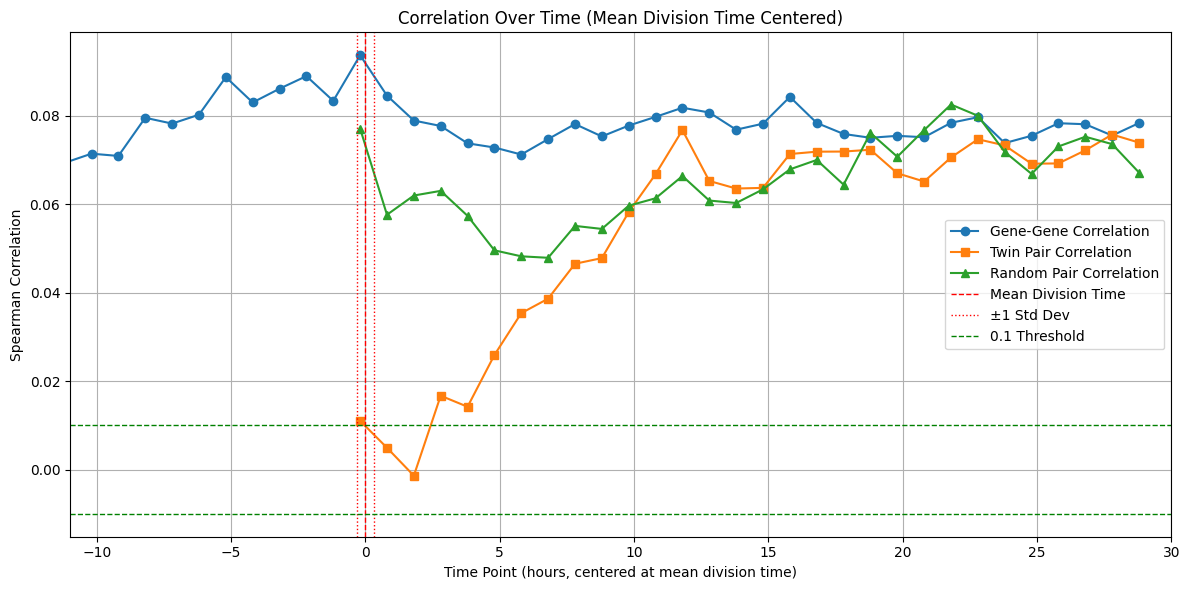

Variation: 0.002


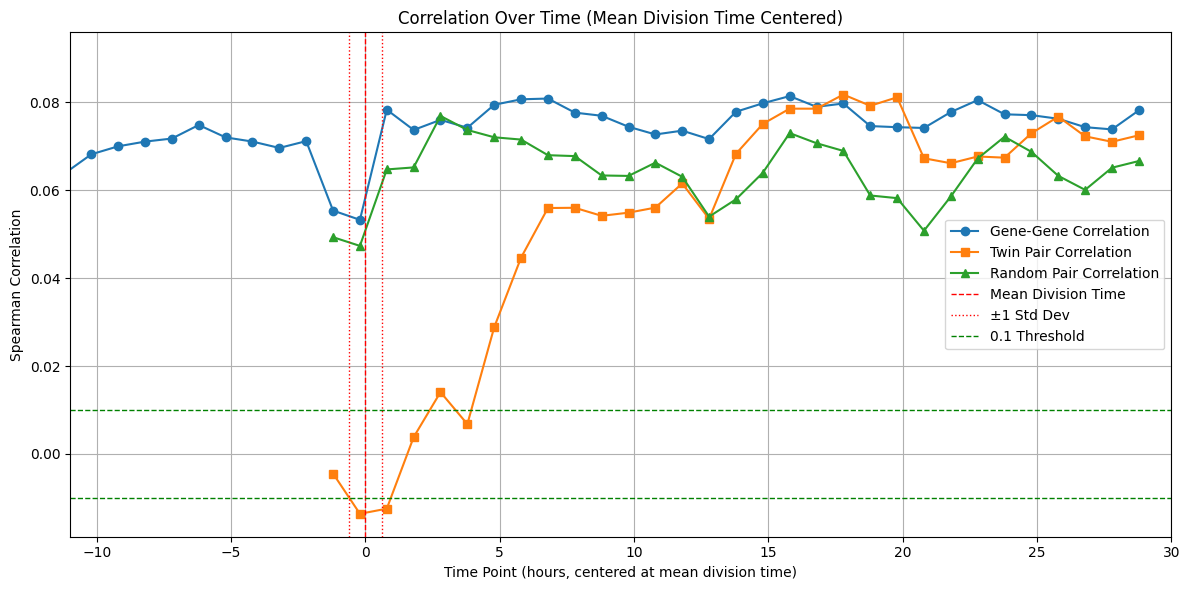

Variation: 0.003


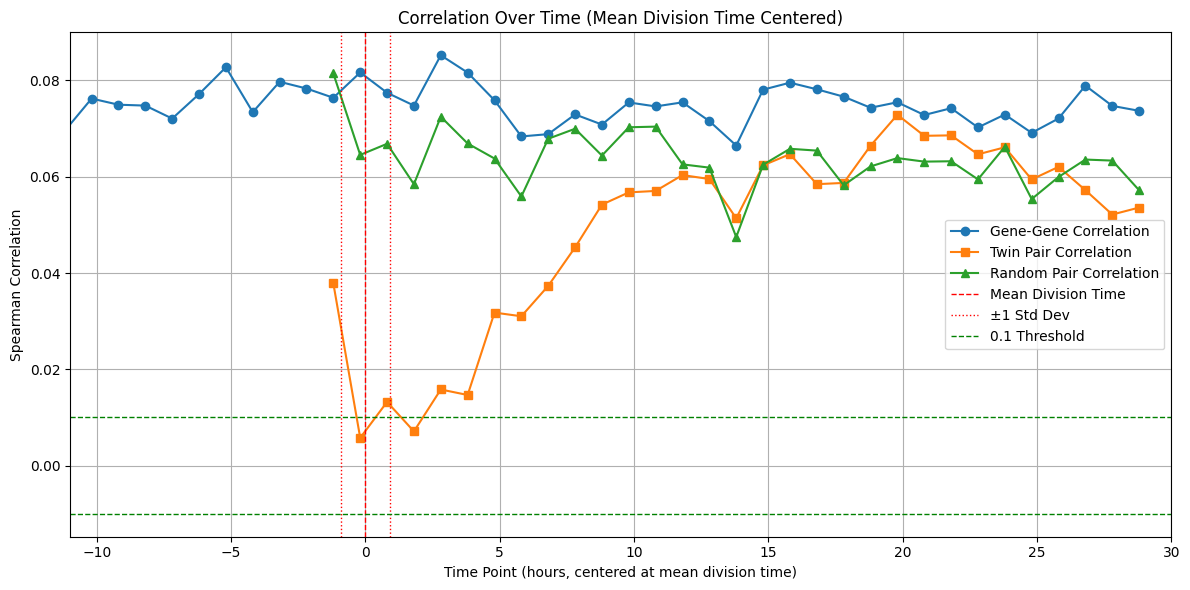

Variation: 0.004


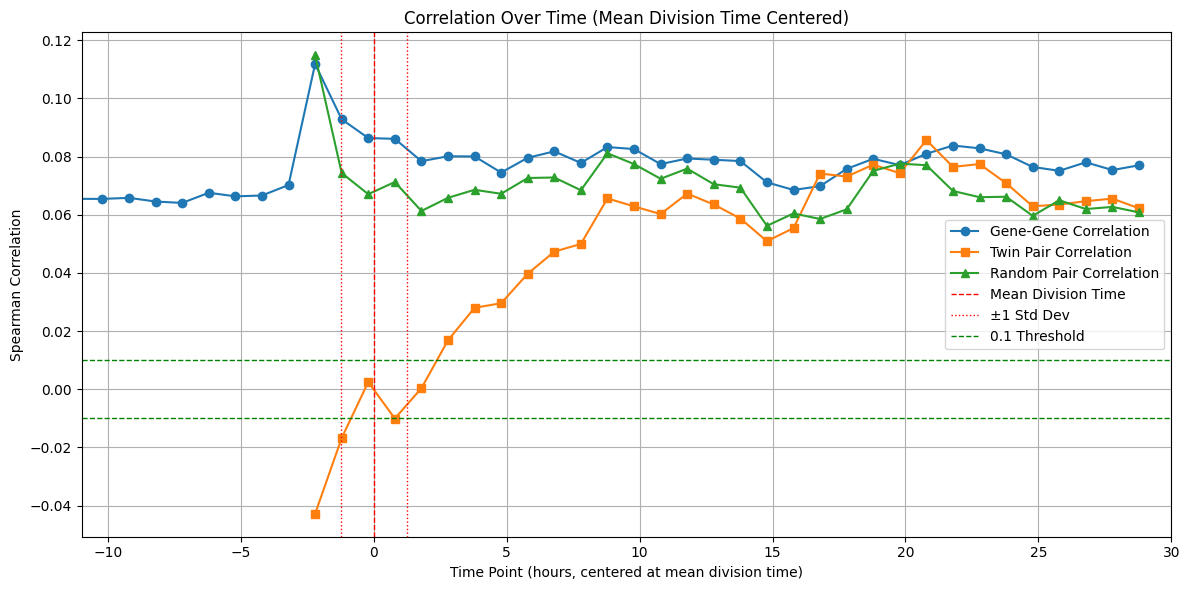

Variation: 0.005


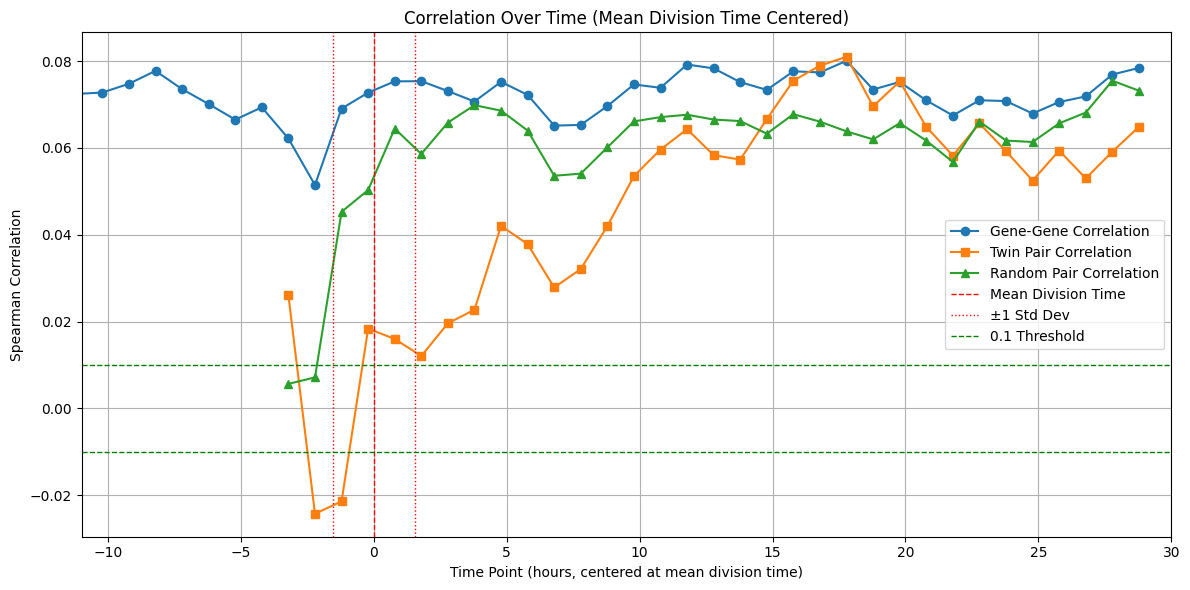

Variation: 0.006


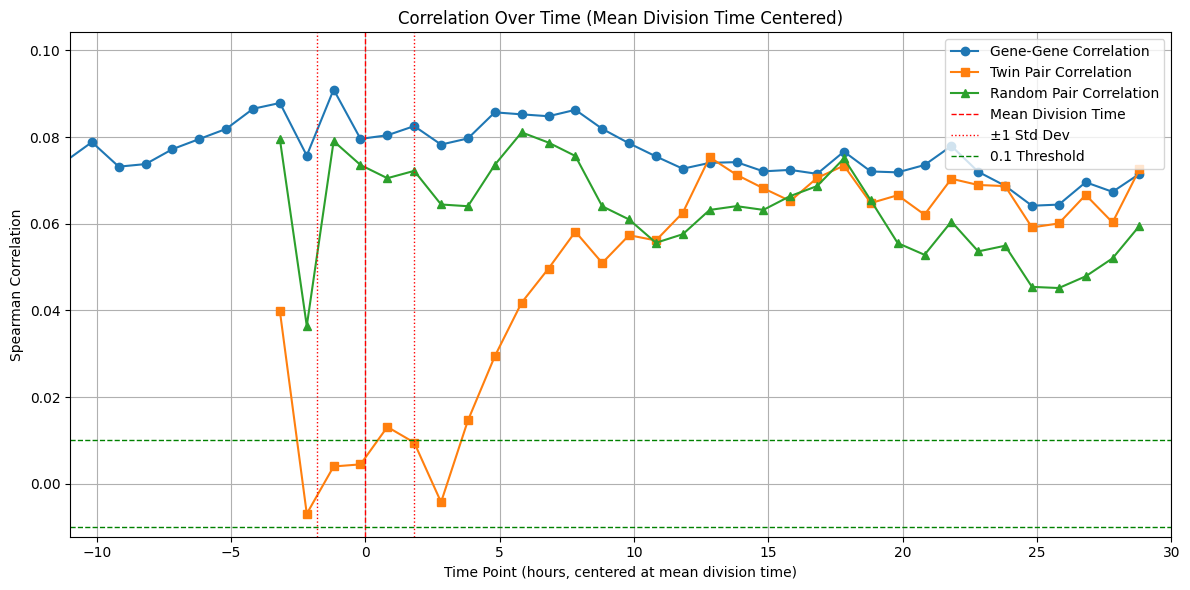

Variation: 0.007


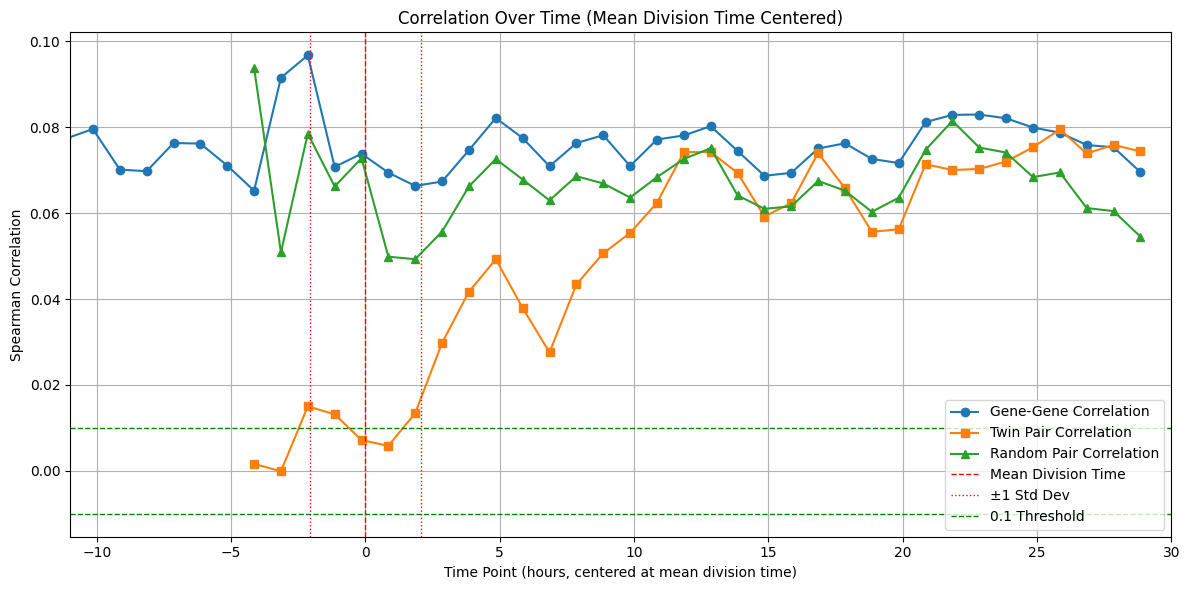

Variation: 0.008


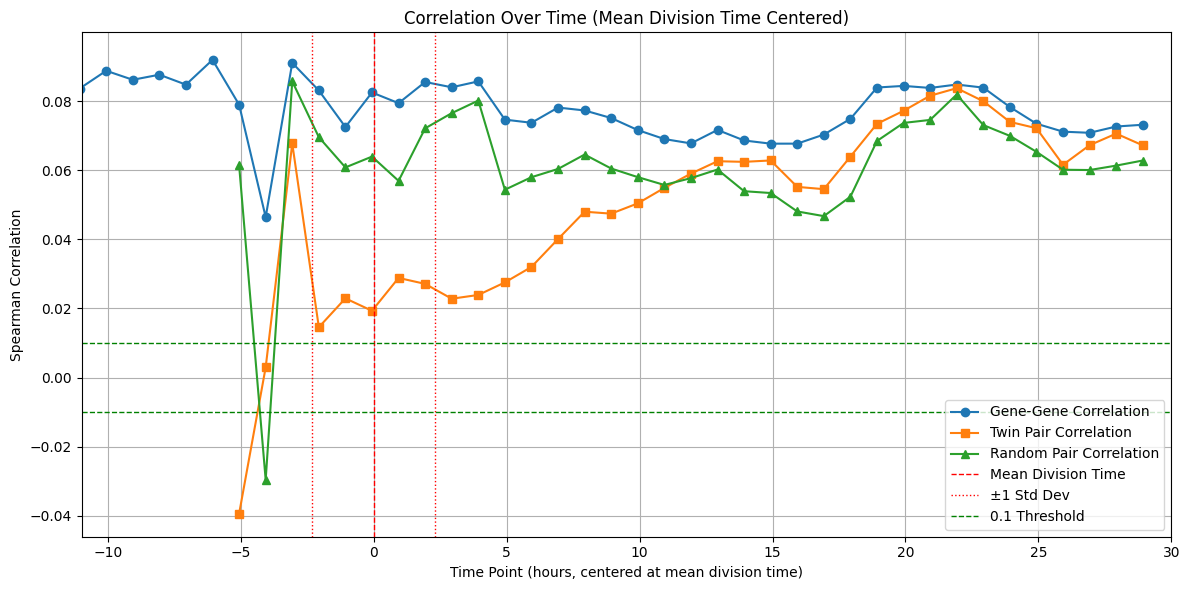

Variation: 0.009000000000000001


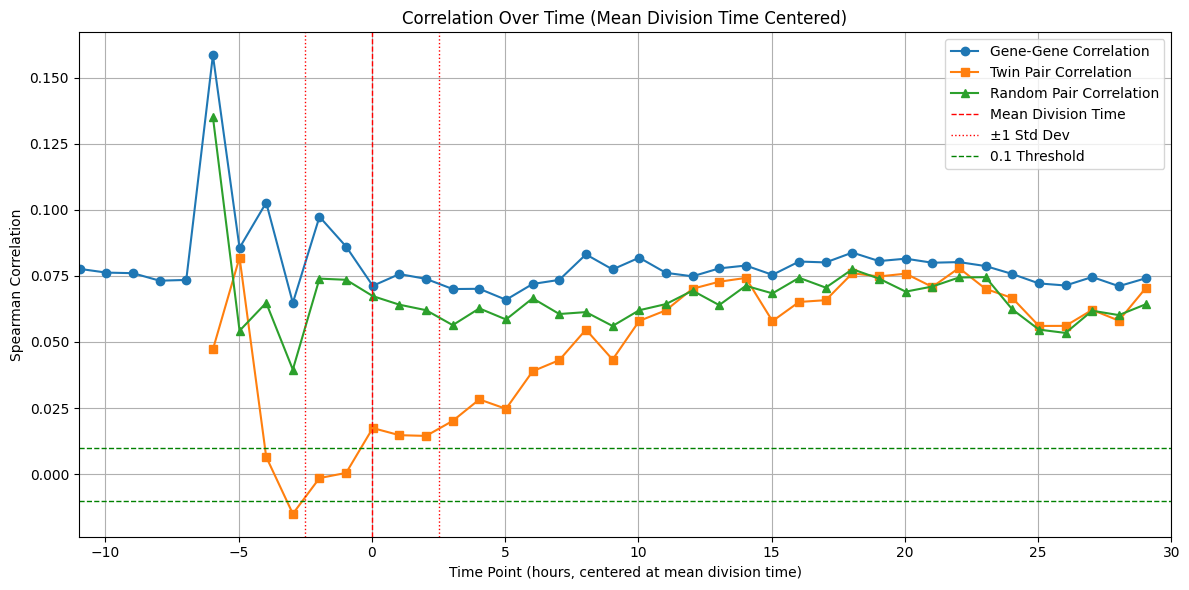

Variation: 0.010000000000000002


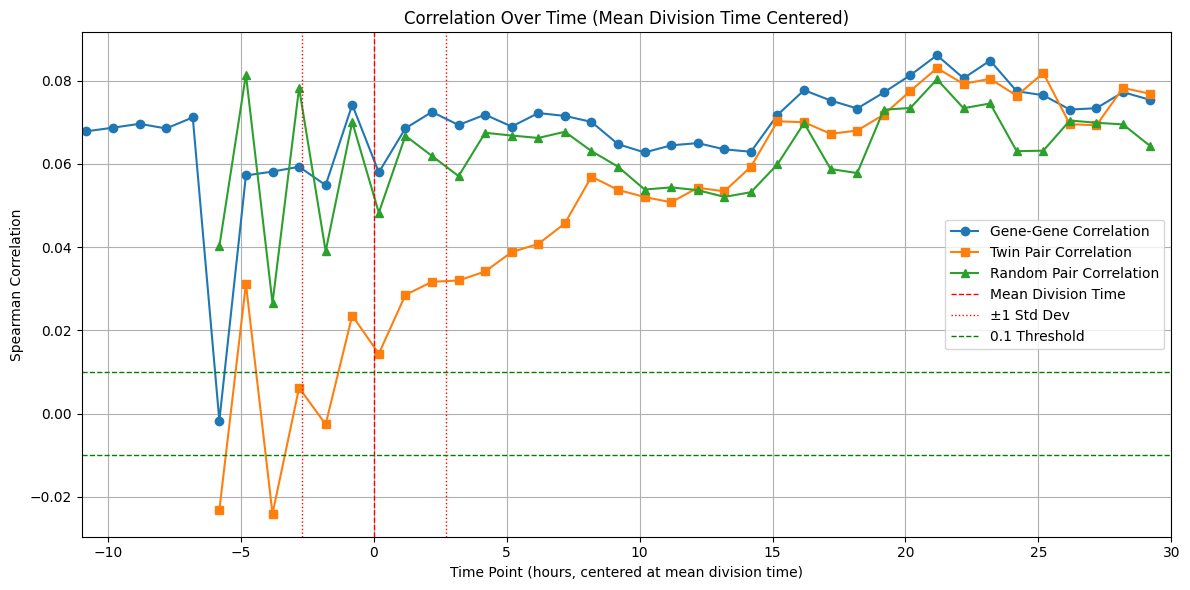

In [79]:
#plot the correlation over time
def plot_correlations_over_time(corr_dict):
    """
    Plot the correlations over time from the correlation DataFrame.
    
    Parameters:
        corr_dict (pd.DataFrame): DataFrame containing correlation data.
    """
    plt.figure(figsize=(12, 6))
    
    # Adjust time points to center mean division time at 0
    adjusted_time = (corr_dict['time_point'] - corr_dict['mean_division_time'].iloc[0]) / 60
    
    # Plot gene-gene correlation
    plt.plot(adjusted_time, corr_dict['gene_gene_correlation'], label='Gene-Gene Correlation', marker='o')
    
    # Plot twin pair correlation
    plt.plot(adjusted_time, corr_dict['twin_pair_correlation'], label='Twin Pair Correlation', marker='s')
    
    # Plot random pair correlation
    plt.plot(adjusted_time, corr_dict['random_pair_correlation'], label='Random Pair Correlation', marker='^')
    
    # Add mean division time line at 0
    plt.axvline(x=0, color='red', linestyle='--', label='Mean Division Time', linewidth=1)
    
    # Add standard deviation lines
    plt.axvline(x=corr_dict['std_division_time'].iloc[0] / 60, color='red', linestyle=':', linewidth=1, label ='±1 Std Dev')
    plt.axvline(x=-corr_dict['std_division_time'].iloc[0] / 60, color='red', linestyle=':', linewidth=1)
    
    # Add threshold lines
    plt.axhline(y=0.01, color='green', linestyle='--', label='0.1 Threshold', linewidth=1)
    plt.axhline(y=-0.01, color='green', linestyle='--', linewidth=1)
    
    plt.xlabel('Time Point (hours, centered at mean division time)')
    plt.ylabel('Spearman Correlation')
    plt.title('Correlation Over Time (Mean Division Time Centered)')
    plt.legend()
    plt.grid(True)
    plt.xticks(np.arange(-10, 31, 5))  # Adjust x-axis ticks for centered time
    plt.xlim(-11, 30)  # Set x-axis limits
    plt.tight_layout()
    plt.show()

# Plot the correlations over time
for variation in corr_dict_list['sigma'].unique():
    corr_dict = corr_dict_list[corr_dict_list['sigma'] == variation]
    print(f"Variation: {variation}")
    plot_correlations_over_time(corr_dict)